TABATINGA 1 of 70
PALMEIRASDOJAVARI 2 of 70
THAUMATURGO 3 of 70
PORTOWALTER 4 of 70
SERRADOMOA 5 of 70
CRUZEIRODOSUL 6 of 70
IPIXUNA 7 of 70
EIRUNEPÉ-MONTANTE 8 of 70
SERINGALSANTAHELENA 9 of 70
FEIJÓ 10 of 70
SANTOSDUMONT 11 of 70
VILABITTENCOURT 12 of 70
ACANAUI 13 of 70
MANOELURBANO 14 of 70
SERINGALSÃOJOSÉ 15 of 70
SENAMADUREIRA 16 of 70
SERINGALGUARANY 17 of 70
ASSISBRASIL 18 of 70
ASSISBRASIL-CPRM 19 of 70
BRASILÉIA 20 of 70
RIOBRANCO 21 of 70
RIOBRANCO-CPRM 22 of 70
VALPARAÍSO-MONTANTE 23 of 70
LÁBREA 24 of 70
BERURI 25 of 70
MANACAPURU 26 of 70
CUCUÍ 27 of 70
TARAQUÁ 28 of 70
CURICURIARI 29 of 70
UAICÁS 30 of 70
MARACÁ 31 of 70
FAZENDACAJUPIRANGA 32 of 70
FAZENDAPASSARÃO 33 of 70
PONTEDOTACUTU 34 of 70
FAZENDAPARAÍSO 35 of 70
VILASURUMU 36 of 70
FAZENDABANDEIRABRANCA 37 of 70
FÉEESPERANÇA 38 of 70
MUCAJAÍ 39 of 70
CARACARAÍ 40 of 70
PONTESELACERDA 41 of 70
PIMENTEIRAS 42 of 70
PEDRASNEGRAS 43 of 70
CACHOEIRADOCACHIMBO 44 of 70
PRINCIPEDABEIRA 45 of 70
GUAJARÁ-

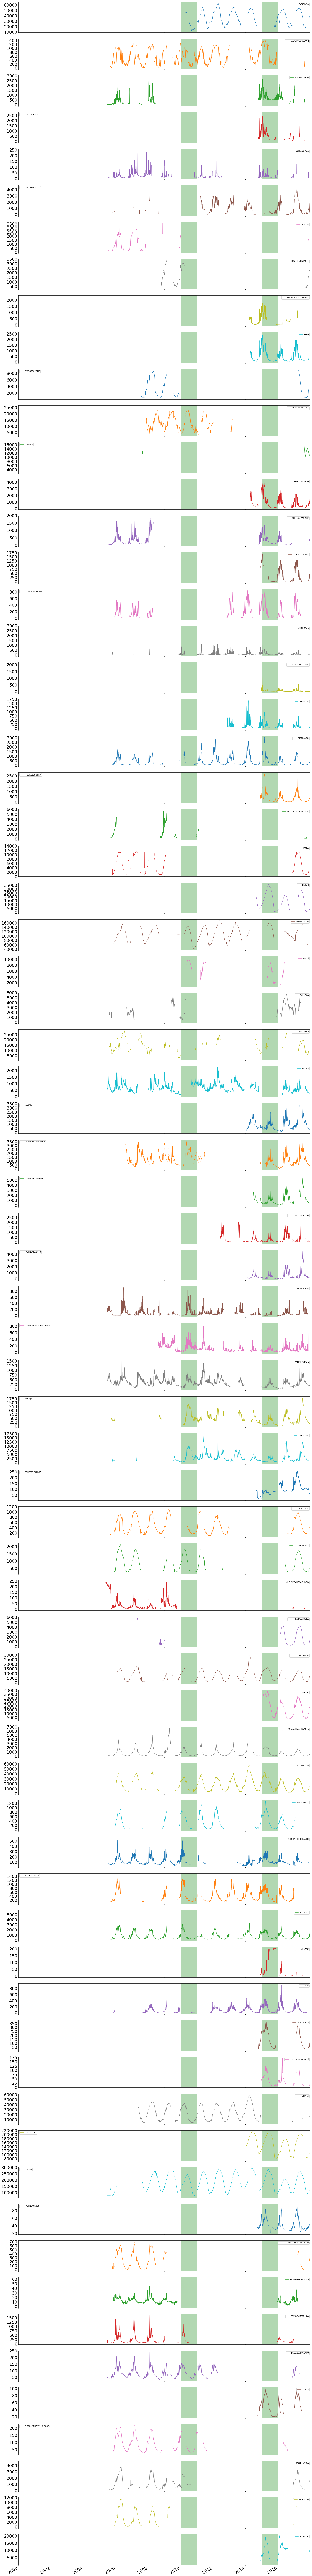

In [29]:
import numpy as np
import pandas as pd
import fileinput
import os,sys
import matplotlib.pyplot as plt

#Specify paths
KNMIpath = "/nobackup/users/killaars/ELNino/Discharge_ANA/"
MACpath = "/Users/killaars/PhD/Elnino/Discharge/discharge_files_ANA/"
path=MACpath

# Create dataframe in which the station date will be inserted, first timeseries as the index
timeseries = pd.date_range('1/1/2000', '31/12/2017', freq='D')
alldata = pd.DataFrame({},index=timeseries)

# initialize output counter
counter = 1

# Go through all the files in the directory one by one
for root, dirs, files in os.walk(path):
    for file in sorted(files):
        if file.endswith('.txt'):
            name=file.split('_')[0][8:]
            print(name,counter, "of 70")
            counter +=1
            # Clean up the files, only necessary for the first full run.
            fullpath = os.path.join(path,file)
            with fileinput.FileInput(fullpath, inplace=True, backup='.bak') as file:
                for line in file:
                    print(" ".join(line.split()))

            # Read data from file, seperated by space and 4 columns of data
            data = pd.read_csv(fullpath, sep=" ")
            data.columns = ["Date", "Time", "Discharge", "etc."]
            
            # Delete first line of table:
            data=data.drop(data.index[0])
            
            # Create new data column with similar date format as in the index of the big dataframe:
            data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
            
            # Group data per daily mean
            grouped_data=data['Discharge'].groupby(data['new_date']).mean()
            
            # Insert mean discharge per day of current station in the big dataframe:
            alldata[name]=grouped_data
#print(alldata)

# Make subplots of the dataframe, each column gets a different plot and the fontsize is for the x and y ticks
ax=alldata.plot(subplots=True, figsize=(30, 300),fontsize=24);

# shaded bar in the vertical between the two dates. One for the drought of 2010 and one for 2015
[i.axvspan('2010-01-01', '2011-01-01', facecolor='g', alpha=0.3) for i in ax]
[i.axvspan('2015-01-01', '2016-01-01', facecolor='g', alpha=0.3) for i in ax] 

# Save and show
plt.savefig('/Users/killaars/PhD/Elnino/Discharge/plots.png',dpi=100)
plt.show()

              Date      Time  Discharge  etc.
1       23/01/2014  00:15:00        NaN   NaN
2       23/01/2014  00:30:00        NaN   NaN
3       23/01/2014  00:45:00        NaN   NaN
4       23/01/2014  01:00:00        NaN   NaN
5       23/01/2014  01:15:00        NaN   NaN
6       23/01/2014  01:30:00        NaN   NaN
7       23/01/2014  01:45:00        NaN   NaN
8       23/01/2014  02:00:00        NaN   NaN
9       23/01/2014  02:15:00        NaN   NaN
10      23/01/2014  02:30:00        NaN   NaN
11      23/01/2014  02:45:00        NaN   NaN
12      23/01/2014  03:00:00        NaN   NaN
13      23/01/2014  03:15:00        NaN   NaN
14      23/01/2014  03:30:00        NaN   NaN
15      23/01/2014  03:45:00        NaN   NaN
16      23/01/2014  04:00:00        NaN   NaN
17      23/01/2014  04:15:00        NaN   NaN
18      23/01/2014  04:30:00        NaN   NaN
19      23/01/2014  04:45:00        NaN   NaN
20      23/01/2014  05:00:00        NaN   NaN
21      23/01/2014  05:15:00      

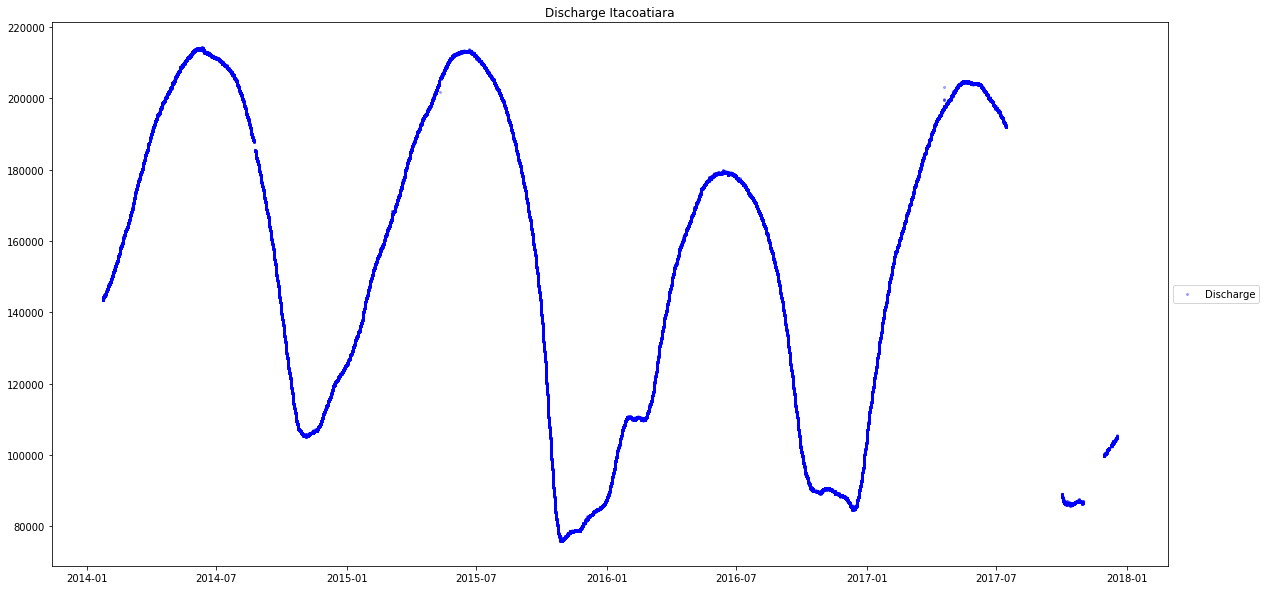

In [53]:
import numpy as np
import pandas as pd
import fileinput
import os,sys
import matplotlib.pyplot as plt
#import seaborn as sns

with fileinput.FileInput('/usr/people/killaars/Downloads/16030000ITACOATIARA_2312014-18122017.txt', inplace=True, backup='.bak') as file:
    for line in file:
        print(" ".join(line.split()))

data = pd.read_csv('/usr/people/killaars/Downloads/16030000ITACOATIARA_2312014-18122017.txt', sep=" ")
#data = pd.read_fwf('/usr/people/killaars/Downloads/Small_discharge.txt',header=None)
data.columns = ["Date", "Time", "Discharge", "etc."]

data=data.drop(data.index[0])
print(data)
data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
#print(data)
print(data['Discharge'].groupby(data['new_date']).describe())

f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,10))
size = 2
alpha=.3
ax1.set_title('Discharge Itacoatiara')
ax1.plot_date(x=data.new_date, y=data.Discharge, color='b', alpha=alpha, ms=size)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

              Date      Time  Discharge  etc.
1       29/06/2005  01:00:00        NaN   NaN
2       29/06/2005  02:00:00        NaN   NaN
3       29/06/2005  03:00:00     220.00   NaN
4       29/06/2005  04:00:00     220.00   NaN
5       29/06/2005  05:00:00        NaN   NaN
6       29/06/2005  06:00:00        NaN   NaN
7       29/06/2005  07:00:00        NaN   NaN
8       29/06/2005  08:00:00        NaN   NaN
9       29/06/2005  09:00:00     220.00   NaN
10      29/06/2005  10:00:00     220.00   NaN
11      29/06/2005  11:00:00     220.00   NaN
12      29/06/2005  12:00:00     220.00   NaN
13      29/06/2005  13:00:00     220.00   NaN
14      29/06/2005  14:00:00     220.00   NaN
15      29/06/2005  15:00:00     220.00   NaN
16      29/06/2005  16:00:00     220.00   NaN
17      29/06/2005  17:00:00     220.00   NaN
18      29/06/2005  18:00:00     220.00   NaN
19      29/06/2005  19:00:00     220.00   NaN
20      29/06/2005  20:00:00     220.00   NaN
21      29/06/2005  21:00:00     2

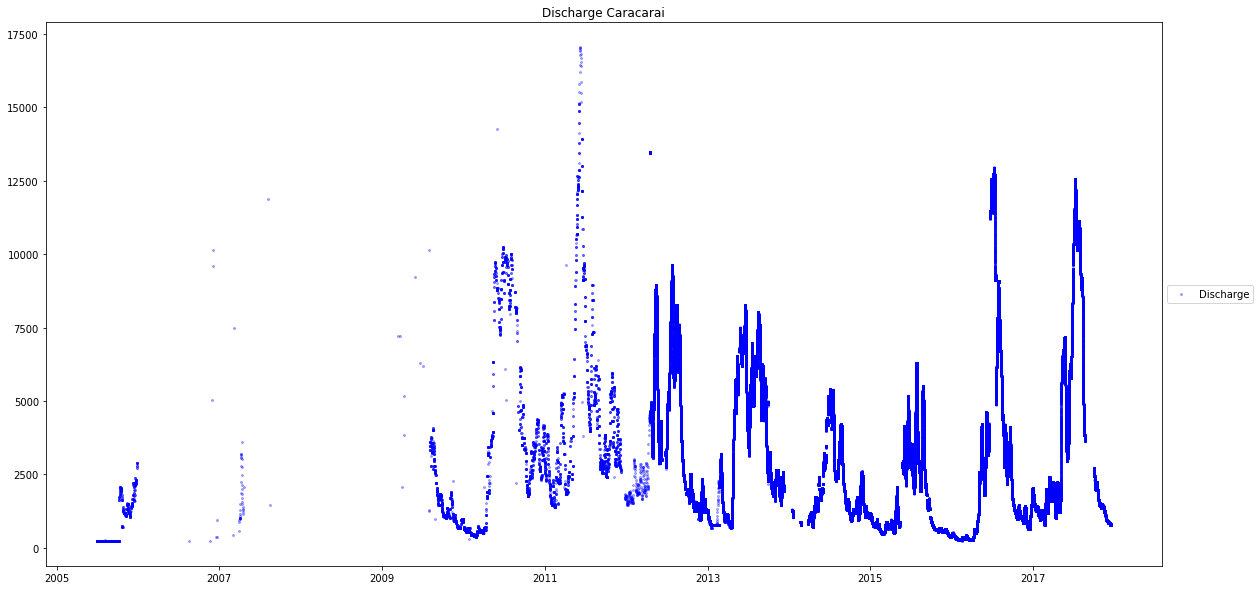

In [54]:
with fileinput.FileInput('/usr/people/killaars/Downloads/14710000CARACARAÍ_2962005-18122017.txt', inplace=True, backup='.bak') as file:
    for line in file:
        print(" ".join(line.split()))

data = pd.read_csv('/usr/people/killaars/Downloads/14710000CARACARAÍ_2962005-18122017.txt', sep=" ")
#data = pd.read_fwf('/usr/people/killaars/Downloads/Small_discharge.txt',header=None)
data.columns = ["Date", "Time", "Discharge", "etc."]

data=data.drop(data.index[0])
print(data)
data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
#print(data)
print(data['Discharge'].groupby(data['new_date']).describe())

f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,10))
size = 2
alpha=.3
ax1.set_title('Discharge Caracarai')
ax1.plot_date(x=data.new_date, y=data.Discharge, color='b', alpha=alpha, ms=size)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

              Date      Time  Discharge  etc.
1       29/06/2005  01:00:00        NaN   NaN
2       29/06/2005  02:00:00        NaN   NaN
3       29/06/2005  03:00:00    77400.0   NaN
4       29/06/2005  04:00:00    77400.0   NaN
5       29/06/2005  05:00:00    77400.0   NaN
6       29/06/2005  06:00:00    77400.0   NaN
7       29/06/2005  07:00:00    77400.0   NaN
8       29/06/2005  08:00:00    77400.0   NaN
9       29/06/2005  09:00:00    77400.0   NaN
10      29/06/2005  10:00:00    77400.0   NaN
11      29/06/2005  11:00:00    77400.0   NaN
12      29/06/2005  12:00:00    77400.0   NaN
13      29/06/2005  13:00:00    77400.0   NaN
14      29/06/2005  14:00:00    77400.0   NaN
15      29/06/2005  15:00:00    77400.0   NaN
16      29/06/2005  16:00:00    77400.0   NaN
17      29/06/2005  17:00:00    77400.0   NaN
18      29/06/2005  18:00:00    77400.0   NaN
19      29/06/2005  19:00:00    77400.0   NaN
20      29/06/2005  20:00:00    77400.0   NaN
21      29/06/2005  21:00:00    77

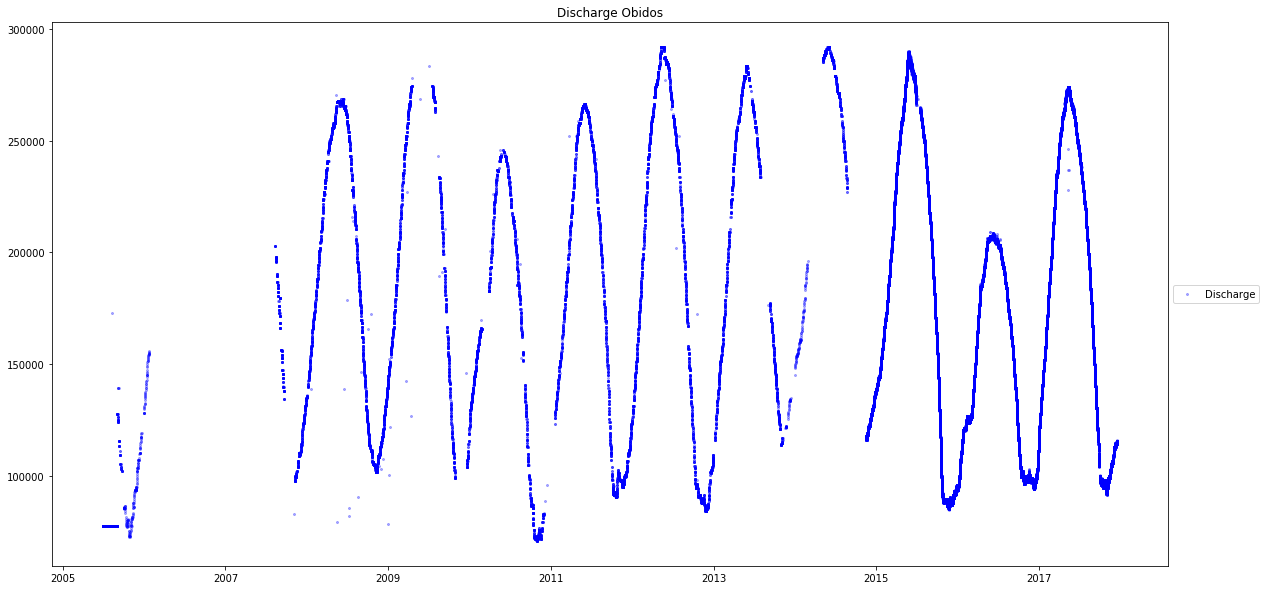

In [71]:
with fileinput.FileInput('/usr/people/killaars/Downloads/17050001ÓBIDOS_2962005-18122017.txt', inplace=True, backup='.bak') as file:
    for line in file:
        print(" ".join(line.split()))

data = pd.read_csv('/usr/people/killaars/Downloads/17050001ÓBIDOS_2962005-18122017.txt', sep=" ")
#data = pd.read_fwf('/usr/people/killaars/Downloads/Small_discharge.txt',header=None)
data.columns = ["Date", "Time", "Discharge", "etc."]

data=data.drop(data.index[0])
print(data)
data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
#print(data)
print(data['Discharge'].groupby(data['new_date']).describe())

f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,10))
size = 2
alpha=.3
ax1.set_title('Discharge Obidos')
ax1.plot_date(x=data.new_date, y=data.Discharge, color='b', alpha=alpha, ms=size)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()